# Decision Trees and Random Forests Project

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

In [3]:
loans = pd.read_csv('D:\\P Y T H O N\\Machine Learning\\DecisionTree-RandomForest\\loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
loans[loans['dti']==0]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
32,1,home_improvement,0.0743,155.38,11.918391,0.0,777,7128.958333,6053,19.5,0,0,0,0
43,1,home_improvement,0.1028,97.20,12.206073,0.0,677,3779.958333,0,0.0,0,1,0,0
112,1,all_other,0.0743,117.31,11.695247,0.0,772,3929.958333,0,0.0,1,0,0,0
130,1,small_business,0.1217,166.48,9.210340,0.0,662,2250.000000,875,54.7,2,1,0,1
174,1,home_improvement,0.0712,92.80,11.440355,0.0,812,8250.000000,368,1.2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8438,0,educational,0.0800,15.67,8.101678,0.0,747,570.000000,0,0.0,0,0,0,0
8976,0,major_purchase,0.1411,71.89,9.998798,0.0,727,870.000000,312,4.2,3,0,0,0
9011,0,educational,0.1947,184.49,9.210340,0.0,682,541.000000,0,0.0,0,0,0,0
9437,0,major_purchase,0.1461,124.12,10.239960,0.0,692,1530.041667,0,0.0,6,0,0,0


## Exploratory Data Analysis (EDA)

Text(0.5, 0, 'FICO')

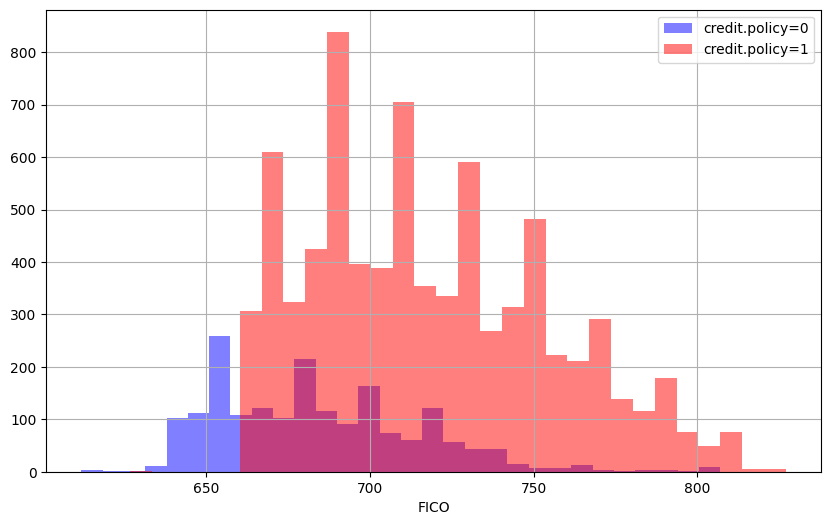

In [7]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='blue',bins=30,label='credit.policy=0')
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='red',bins=30,label='credit.policy=1')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

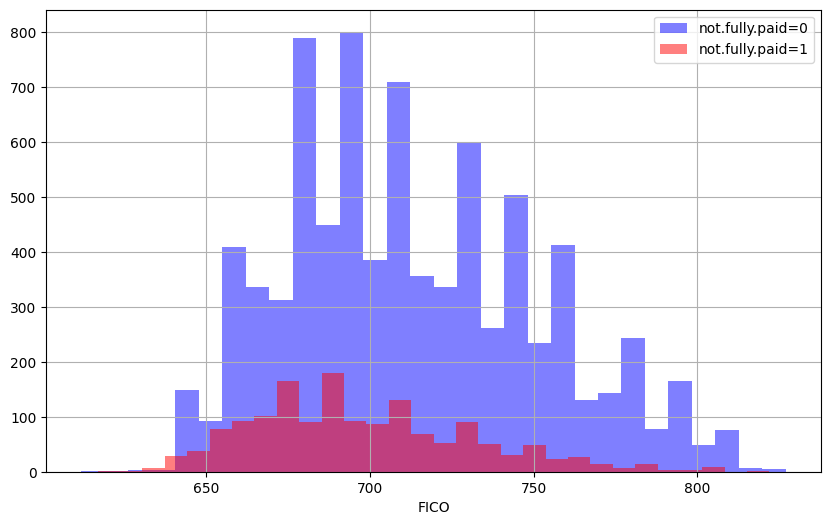

In [8]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=0')
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=1')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot: xlabel='purpose', ylabel='count'>

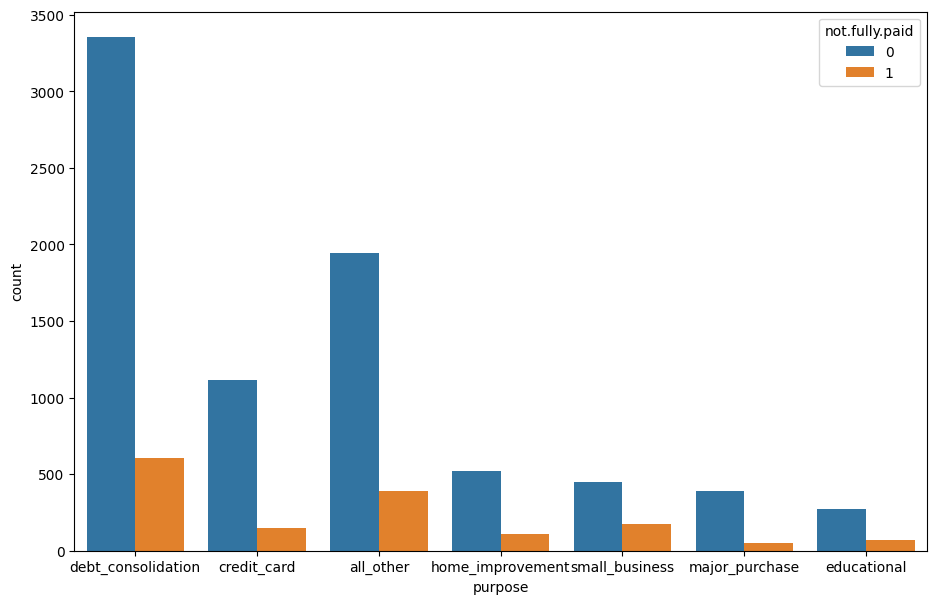

In [9]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',data=loans,hue='not.fully.paid')

In [10]:
loans[loans['purpose']=='debt_consolidation']['not.fully.paid'].value_counts()

0    3354
1     603
Name: not.fully.paid, dtype: int64

In [11]:
603/(3354+603)

0.15238817285822592

In [12]:
loans[loans['purpose']=='major_purchase']['not.fully.paid'].value_counts()

0    388
1     49
Name: not.fully.paid, dtype: int64

In [13]:
49/(388+49)

0.11212814645308924